#그래프 연산

In [13]:
class add_graph:
    def __init__(self):
        pass
    def forward(self, x, y):
        out = x + y
        return out
    def backward(self, dout):
        dx = 1 * dout
        dy = 1 * dout
        return dx, dy


In [15]:
class mul_graph:
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    def backward(self, dout):
        dx = self.y * dout
        dy = self.x * dout
        return dx, dy

In [36]:
class mse_graph:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
        self.x = None
    def forward(self, y, t):
        self.t = t
        self.y = y
        self.loss = np.square(self.t - self.y).sum() / self.t.shape[0]
        return self.loss
    def backward(self, x, dout=1):
        data_size = self.t.shape[0]
        dweight_mse = (((self.y - self.t) * x).sum() * 2 / data_size)
        dbias_mse = (self.y - self.t).sum() * 2 / data_size
        return dweight_mse, dbias_mse


In [23]:
apple = 100
apple_num = 3
orange = 150
orange_num = 3
tax = 1.1

In [17]:
mul_apple_graph = mul_graph()
mul_orange_graph = mul_graph()
add_apple_orange_graph = add_graph()
mul_tax_graph = mul_graph()

In [24]:
apple_price = mul_apple_graph.forward(apple, apple_num)
orange_price = mul_orange_graph.forward(orange, orange_num)
all_price = add_apple_orange_graph.forward(apple_price, orange_price)
total_price = mul_tax_graph.forward(all_price, tax)
print(total_price)

825.0000000000001


In [20]:
dprice = 1
dall_price, dtax = mul_tax_graph.backward(dprice)
dapple_price, dorange_price = add_apple_orange_graph.backward(dall_price)
dorange, dorange_num = mul_orange_graph.backward(dorange_price)
dapple, dapple_num = mul_apple_graph.backward(dapple_price)
print('dApple', dapple)
print('dApple_num', dapple_num)
print('dOrange', dorange)
print('dOrange_num', dapple_num)

dApple 2.2
dApple_num 110.00000000000001
dOrange 3.3000000000000003
dOrange_num 110.00000000000001


In [25]:
import numpy as np

In [26]:
def celcius_to_fahrenheit(x):
    return x * 1.8 + 32

In [28]:
weight = np.random.uniform(0, 5, 1)
print(weight)
bias = 0

[2.38111981]


In [29]:
data_C = np.arange(0, 100)
data_F = celcius_to_fahrenheit(data_C)
scaled_data_C = data_C / 100
scaled_data_F = data_F / 100
print(scaled_data_C)
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76 

In [30]:
weight_graph = mul_graph()
bias_graph = add_graph()

In [31]:
weighted_data = weight_graph.forward(weight, scaled_data_C)
predict_data = bias_graph.forward(weighted_data, bias)
print(predict_data)

[0.         0.0238112  0.0476224  0.07143359 0.09524479 0.11905599
 0.14286719 0.16667839 0.19048958 0.21430078 0.23811198 0.26192318
 0.28573438 0.30954558 0.33335677 0.35716797 0.38097917 0.40479037
 0.42860157 0.45241276 0.47622396 0.50003516 0.52384636 0.54765756
 0.57146875 0.59527995 0.61909115 0.64290235 0.66671355 0.69052475
 0.71433594 0.73814714 0.76195834 0.78576954 0.80958074 0.83339193
 0.85720313 0.88101433 0.90482553 0.92863673 0.95244792 0.97625912
 1.00007032 1.02388152 1.04769272 1.07150392 1.09531511 1.11912631
 1.14293751 1.16674871 1.19055991 1.2143711  1.2381823  1.2619935
 1.2858047  1.3096159  1.33342709 1.35723829 1.38104949 1.40486069
 1.42867189 1.45248308 1.47629428 1.50010548 1.52391668 1.54772788
 1.57153908 1.59535027 1.61916147 1.64297267 1.66678387 1.69059507
 1.71440626 1.73821746 1.76202866 1.78583986 1.80965106 1.83346225
 1.85727345 1.88108465 1.90489585 1.92870705 1.95251825 1.97632944
 2.00014064 2.02395184 2.04776304 2.07157424 2.09538543 2.11919

In [33]:
dout = 1
dbias, dweighted_data = bias_graph.backward(dout)
dweight, dscaled_data_C = weight_graph.backward(dweighted_data)
print(dbias)
print(dweight)

1
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [37]:
mseGraph = mse_graph()
mse = mseGraph.forward(predict_data, scaled_data_F)
print(mse)

0.02918511597131386


In [38]:
weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
print(weight_mse_gradient)
print(bias_mse_gradient)

0.06482138008962494
-0.0646913867995604


In [42]:
learning_rate = 0.1
learned_weight = weight - \
    learning_rate * weight_mse_gradient * np.average(dweight)
print('befor learning weight :', weight)
print('after learning weight :', learned_weight)

befor learning weight : [2.38111981]
after learning weight : [2.37791115]


In [43]:
learned_bias = bias - learning_rate * bias_mse_gradient * dbias
print('before learning bias :', bias)
print('after learning bias :', learned_bias)

before learning bias : 0
after learning bias : 0.0064691386799560395


In [44]:
error_list = []
weight_list = []
bias_list = []
for i in range(1000):
    #forward
    weighted_data = weight_graph.forward(
        weight, scaled_data_C)
    predict_data = bias_graph.forward(
        weighted_data, bias)
    #backward
    dout = 1
    dbias, dweighted_data = bias_graph.backward(dout)
    dweight, dscaled_data_C = weight_graph.backward(dweighted_data)
    #mse
    mse = mseGraph.forward(predict_data, scaled_data_F)
    error_list.append(mse)
    weight_mse_gradient, bias_mse_gradient = \
        mseGraph.backward(scaled_data_C)
    #learning
    weight_list.append(weight)
    weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
    bias_list.append(bias)
    bias = bias - learning_rate * bias_mse_gradient * dbias
weight_list.append(weight)
bias_list.append(bias)
print(weight)
print(bias)

[1.80037512]
0.3198072537378003


In [45]:
print(error_list[-1])

1.1949504430017897e-08


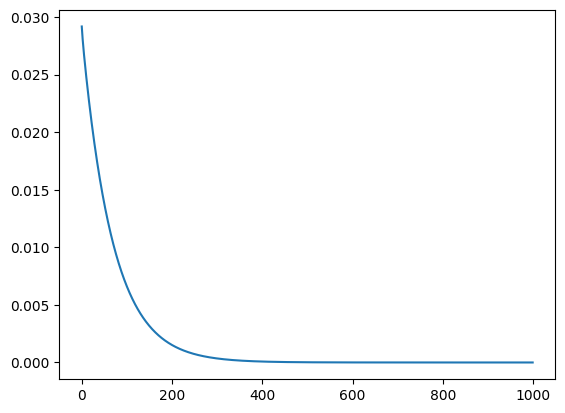

In [46]:
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()

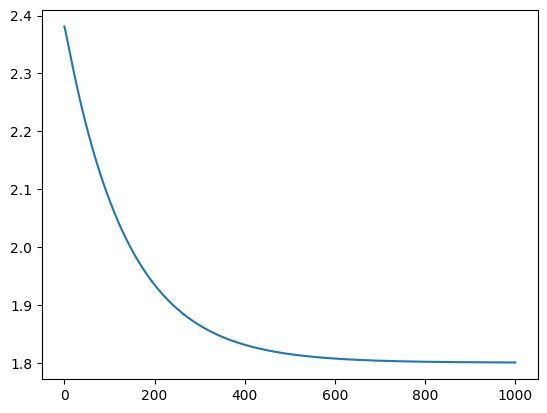

In [47]:
plt.plot(weight_list)
plt.show()

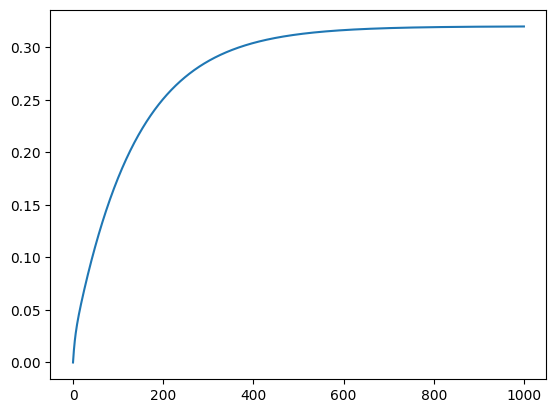

In [49]:
plt.plot(bias_list)
plt.show()